In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=2022)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [3]:
pca = PCA(n_components=2).fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)
print("Original shape of training data: {}".format(str(X_train_norm.shape)))
print("Reduced shape of training data: {}".format(str(X_train_pca.shape)))
print(pca.explained_variance_ratio_)

Original shape of training data: (426, 30)
Reduced shape of training data: (426, 2)
[0.51710029 0.18195193]


In [4]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_norm, y_train)
print("Original data - 1-nn accuracy: {:.2f}".format(knn.score(X_test_norm, y_test)))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Reduced data - 1-nn accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Original data - 1-nn accuracy: 0.96
Reduced data - 1-nn accuracy: 0.94


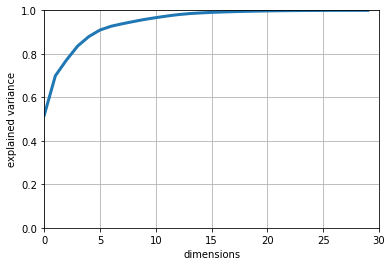

In [5]:
pca = PCA()
pca.fit(X_train_norm)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 30, 0, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()